In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
data = pd.read_csv("/content/drive/MyDrive/diabetes (1).csv")

In [3]:
# feature; column; variable
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.Outcome = data.Outcome.astype(str)

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

Text(0, 0.5, 'Frequency Sıklık')

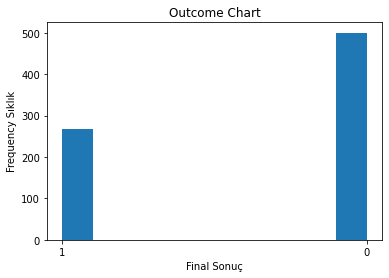

In [9]:
# histogram
plt.hist(data.Outcome)
plt.title("Outcome Chart")
plt.xlabel("Final Sonuç")
plt.ylabel("Frequency Sıklık")

In [10]:
data.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [11]:
data.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

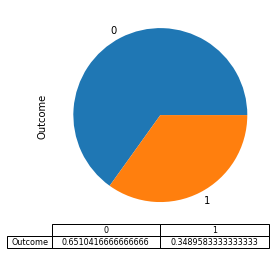

In [12]:
data.Outcome.value_counts(normalize=True).plot(kind="pie", table=True)

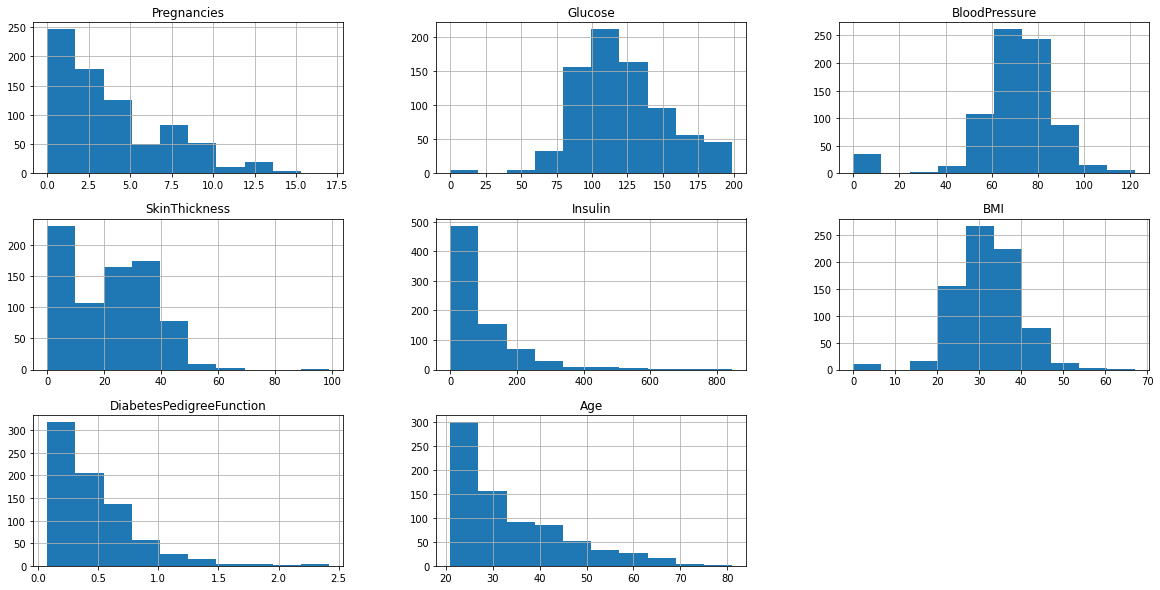

In [13]:
data.hist(figsize=(20,10));

### Feature Engineering and Data Cleaning
---



In [131]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,538.000000,533.000000,536.000000,538.000000,392.000000,536.000000,538.000000,538.000000
mean,3.468401,120.690432,71.466418,28.996283,155.770408,32.869590,0.504794,31.451673
std,3.244236,30.780570,12.318772,10.049597,119.038210,6.879504,0.346999,10.660605
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,98.000000,64.000000,22.000000,76.000000,27.800000,0.259000,23.000000
50%,2.000000,115.000000,72.000000,29.000000,125.500000,32.800000,0.416000,28.000000
75%,5.000000,140.000000,80.000000,36.000000,190.000000,36.900000,0.659500,38.000000
max,14.000000,199.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [93]:
data[data.SkinThickness > 90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins


In [94]:
data = data[data.SkinThickness < 90]

In [95]:
data[data.Pregnancies >15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins


In [96]:
data = data[data.Pregnancies < 15]

In [97]:
eksik_bilgiler = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [98]:
data[eksik_bilgiler] = np.where(data[eksik_bilgiler] == 0, np.nan, data[eksik_bilgiler])

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               538 non-null    int64  
 1   Glucose                   533 non-null    float64
 2   BloodPressure             536 non-null    float64
 3   SkinThickness             538 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       536 non-null    float64
 6   DiabetesPedigreeFunction  538 non-null    float64
 7   Age                       538 non-null    int64  
 8   Outcome                   538 non-null    object 
 9   age_bins                  538 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 46.2+ KB


In [100]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness               False
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

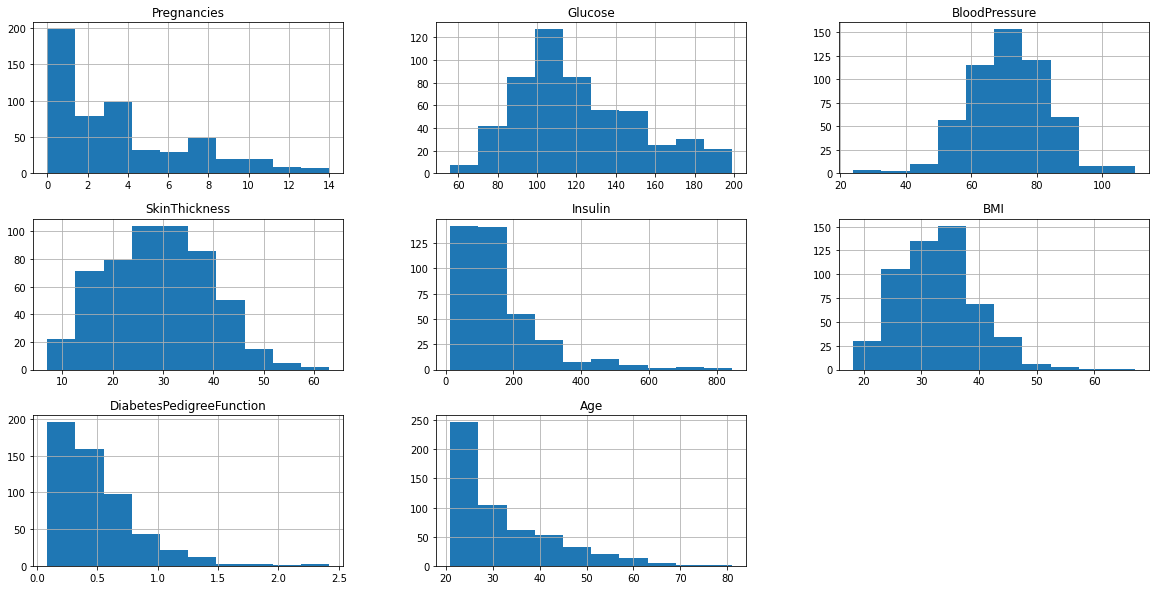

In [101]:
data.hist(figsize= (20,10));

In [102]:
data_yarı_temiz = data.fillna(data.median)

In [103]:
data_yarı_temiz.isnull(). any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [104]:
data[data.BMI.isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
145,0,102.0,75.0,23.0,NaN,NaN,0.572,21,0,"(20, 30]"
371,0,118.0,64.0,23.0,89.0,NaN,1.731,21,0,"(20, 30]"


In [105]:
data["age_bins"] = pd.cut(x=data["Age"], bins=[20,30,40,50,60,70,80,90])

In [106]:
data["age_bins"] = data["age_bins"].astype(str)

In [107]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,"(20, 30]"


In [108]:
data_temiz = data.fillna(data.groupby(["Pregnancies", "Outcome", "age_bins"]).transform("median"))

In [109]:
data.groupby(["Pregnancies","Outcome","age_bins"]).count()

Glucose  BloodPressure  SkinThickness  Insulin  \
Pregnancies Outcome age_bins                                                   
0           0       (20, 30]       47             47             47       35   
                    (30, 40]        3              3              3        2   
                    (50, 60]        2              2              2        1   
            1       (20, 30]       20             20             20       15   
                    (30, 40]        6              6              6        4   
...                               ...            ...            ...      ...   
13          0       (40, 50]        1              1              1        0   
                    (50, 60]        1              1              1        1   
            1       (40, 50]        2              1              2        1   
14          1       (30, 40]        1              1              1        0   
                    (40, 50]        1              1              1        1   

                              BMI  DiabetesPedigreeFunction  Age  
Pregnancies Outcome age_bins                                      
0           0       (20, 30]   45                        47   47  
                    (30, 40]    3                         3    3  
                    (50, 60]    2                         2    2  
            1       (20, 30]   20                        20   20  
                    (30, 40]    6                         6    6  
...                           ...                       ...  ...  
13          0       (40, 50]    1                         1    1  
                    (50, 60]    1                         1    1  
            1       (40, 50]    2                         2    2  
14          1       (30, 40]    1                         1    1  
                    (40, 50]    1                         1    1  

[90 rows x 7 columns]

In [110]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [111]:
data.groupby(["Outcome","age_bins","Pregnancies"]).count()

Glucose  BloodPressure  SkinThickness  Insulin  \
Outcome age_bins Pregnancies                                                   
0       (20, 30] 0                 47             47             47       35   
                 1                 84             87             87       68   
                 2                 62             61             62       49   
                 3                 29             29             29       23   
                 4                 19             19             19       14   
...                               ...            ...            ...      ...   
1       (50, 60] 9                  2              2              2        2   
                 10                 2              2              2        1   
                 11                 2              2              2        2   
                 12                 1              1              1        1   
        (60, 70] 4                  1              1              1        0   

                              BMI  DiabetesPedigreeFunction  Age  
Outcome age_bins Pregnancies                                      
0       (20, 30] 0             45                        47   47  
                 1             87                        87   87  
                 2             62                        62   62  
                 3             29                        29   29  
                 4             19                        19   19  
...                           ...                       ...  ...  
1       (50, 60] 9              2                         2    2  
                 10             2                         2    2  
                 11             2                         2    2  
                 12             1                         1    1  
        (60, 70] 4              1                         1    1  

[90 rows x 7 columns]

In [112]:
data[(data.Outcome == "0" ) & (data.Pregnancies == 7) & (data.age_bins == "(20,30)")]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins


In [113]:
data_temiz = data_temiz.fillna(data_temiz.groupby(['Outcome', 'age_bins']).transform('median'))

In [114]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [115]:
data_temiz = data_temiz.fillna(data_temiz.groupby(['Outcome']).transform('median'))

In [116]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [117]:
data_temiz.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,3.468401,120.607807,71.490706,28.996283,151.185874,32.877138,0.504794,31.451673
std,3.244236,30.663739,12.324028,10.049597,110.528045,6.867795,0.346999,10.660605
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,85.000000,27.825000,0.259000,23.000000
50%,2.000000,115.000000,72.000000,29.000000,120.000000,32.800000,0.416000,28.000000
75%,5.000000,140.000000,80.000000,36.000000,182.000000,36.875000,0.659500,38.000000
max,14.000000,199.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [118]:
data_corr = data_temiz.copy()

In [119]:
data_corr["Outcome"] = data_corr["Outcome"].astype(int)

In [120]:
data_corr.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
age_bins                     object
dtype: object

In [121]:
data_corr.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122467,0.219015,0.102521,0.093438,0.005964,0.003538,0.653613,0.253985
Glucose,0.122467,1.000000,0.222485,0.205548,0.541603,0.246184,0.162355,0.269726,0.498832
BloodPressure,0.219015,0.222485,1.000000,0.238812,0.121954,0.312504,0.006370,0.354544,0.190899
SkinThickness,0.102521,0.205548,0.238812,1.000000,0.181327,0.671272,0.116393,0.135385,0.250460
Insulin,0.093438,0.541603,0.121954,0.181327,1.000000,0.229041,0.145272,0.253676,0.344017
BMI,0.005964,0.246184,0.312504,0.671272,0.229041,1.000000,0.152605,0.075652,0.304452
DiabetesPedigreeFunction,0.003538,0.162355,0.006370,0.116393,0.145272,0.152605,1.000000,0.066184,0.226908
Age,0.653613,0.269726,0.354544,0.135385,0.253676,0.075652,0.066184,1.000000,0.314996
Outcome,0.253985,0.498832,0.190899,0.250460,0.344017,0.304452,0.226908,0.314996,1.000000


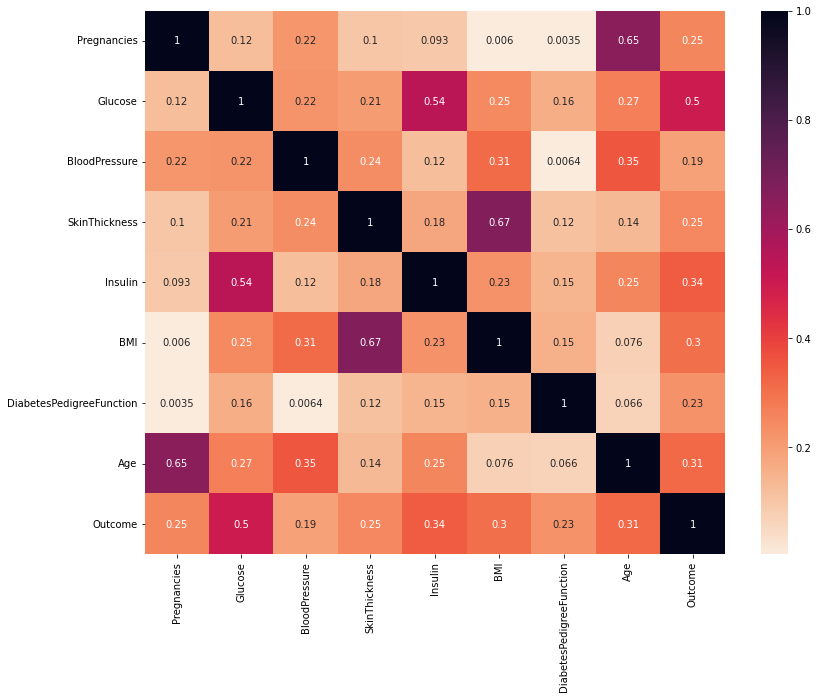

In [122]:
plt.figure(figsize=(13,10))
cmap = sns.color_palette('rocket_r', as_cmap=True)
sns.heatmap(data_corr.corr(), cmap=cmap, annot=True)

In [123]:
# Data visualition

In [124]:
data_temiz = data_temiz.reset_index(drop=True)

In [125]:
data_temiz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
4,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...
533,9,170.0,74.0,31.0,155.0,44.0,0.403,43,1,"(40, 50]"
534,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
535,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
536,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"


Text(0, 0.5, 'Insulin Level')

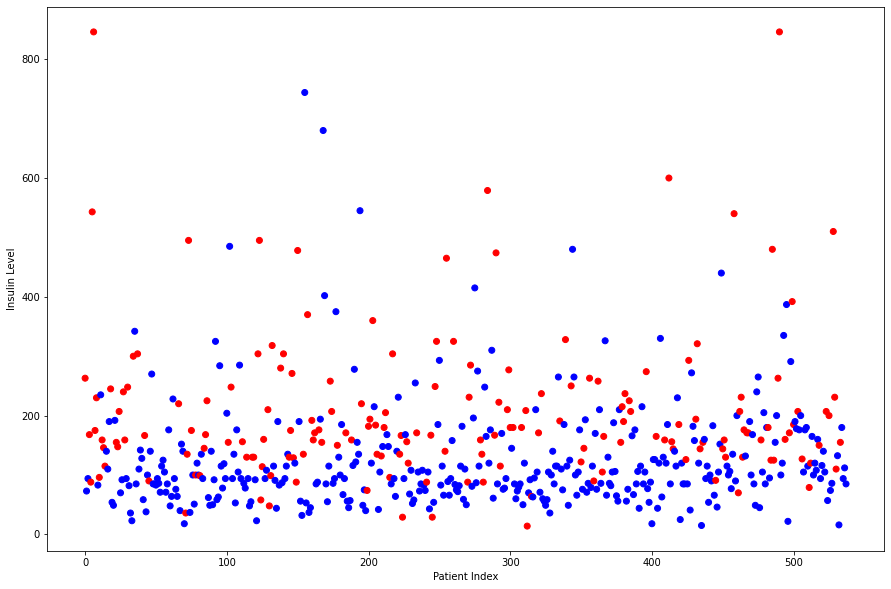

In [126]:
colors ={"0":"blue","1":"red"}
plt.figure(figsize = (15,10))
plt.scatter(data_temiz.index,data_temiz.Insulin, c=data_temiz["Outcome"].map(colors))
plt.xlabel("Patient Index")
plt.ylabel("Insulin Level")

In [127]:
data_temiz.reset_index(drop=False, inplace=True)

In [128]:
data_temiz

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
3,3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
4,4,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...
533,533,9,170.0,74.0,31.0,155.0,44.0,0.403,43,1,"(40, 50]"
534,534,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
535,535,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
536,536,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"


In [129]:
px.scatter(data_temiz, x="index", y="BloodPressure", color="Outcome", color_discrete_sequence=["red","blue"])

Text(0, 0.5, 'Frequency')

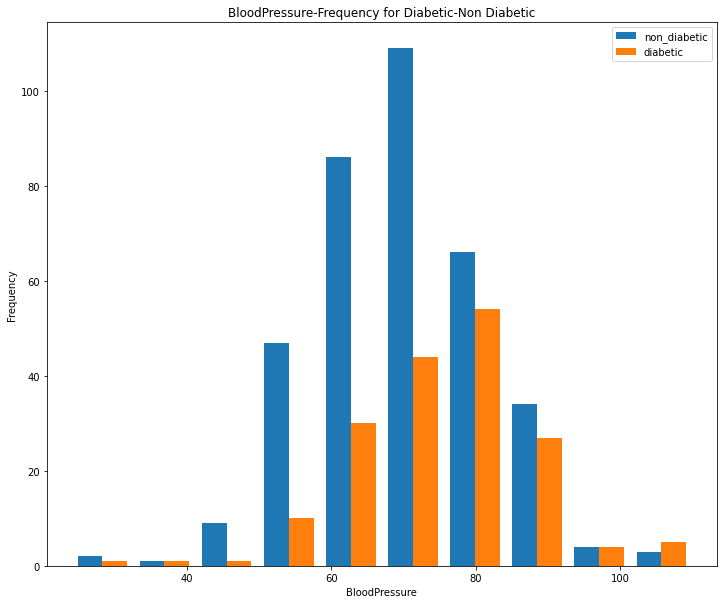

In [130]:
plt.figure(figsize=(12,10))
data_diabetic = data_temiz.loc[data_temiz.Outcome =='1'];
data_non_diabetic = data_temiz.loc[data_temiz.Outcome =='0'];

labels=['non_diabetic', 'diabetic'];
plt.hist([data_non_diabetic['BloodPressure'], data_diabetic['BloodPressure']], label=labels);
plt.legend()
plt.title("BloodPressure-Frequency for Diabetic-Non Diabetic")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")